In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns

In [2]:
df = pd.read_csv("water_potability.csv")

In [3]:
df_sub = df.drop(columns=['Hardness', 'ph', 'Solids', 'Chloramines', 'Potability', 'Turbidity', 'Conductivity'])

In [4]:
df = df.dropna()

In [5]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


In [6]:
subsample_columns = list(df.columns)

predictors = subsample_columns[1:len(subsample_columns) - 1]
categorial = subsample_columns[len(subsample_columns) - 1]
target = subsample_columns[0]

<h1>Step 1</h1>

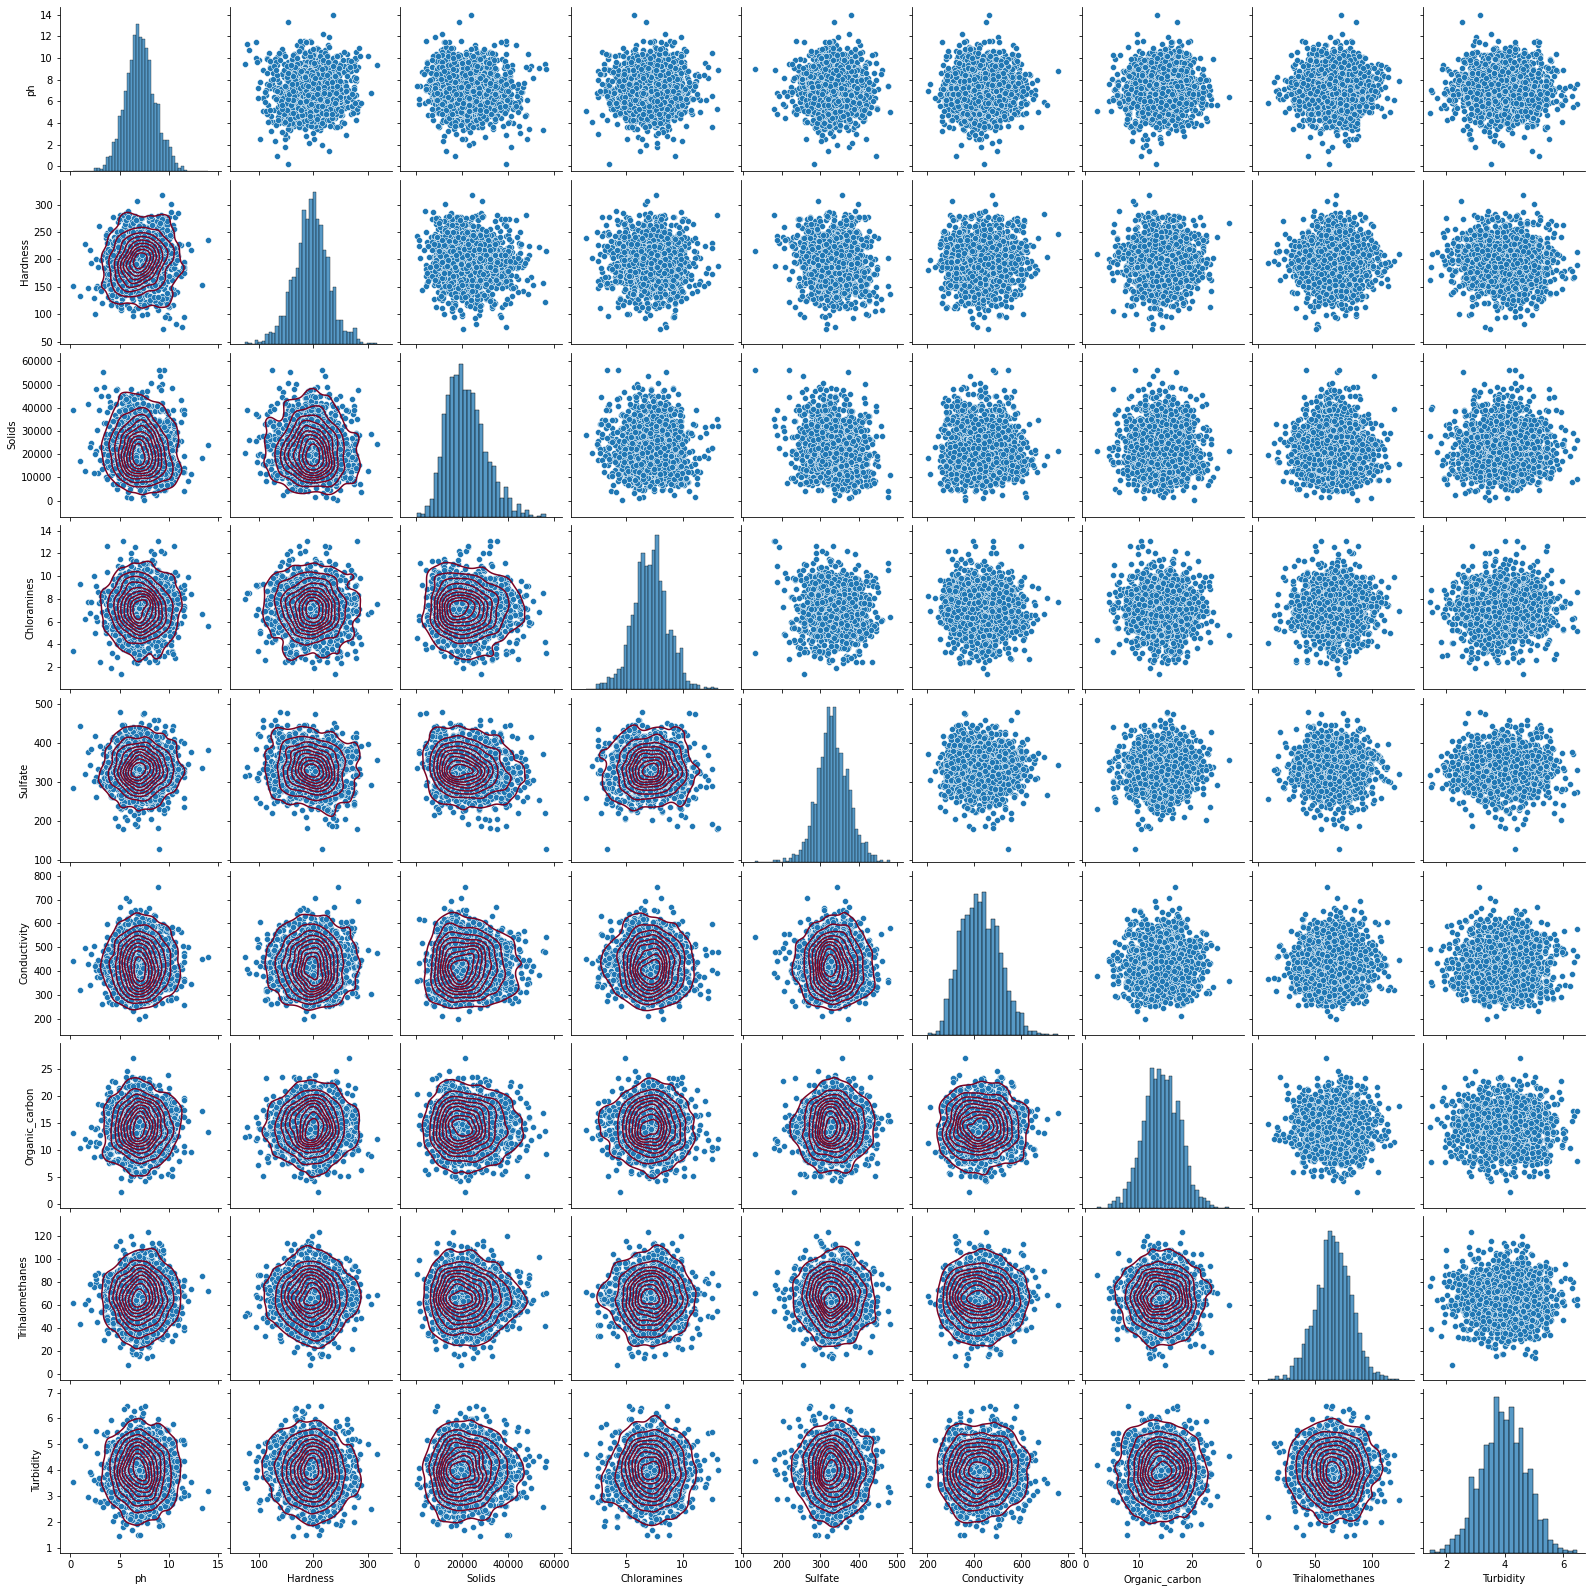

In [7]:
p_plot = sns.pairplot(df.drop(columns='Potability'), kind='scatter', diag_kind='hist')
p_plot.map_lower(sns.kdeplot, color='xkcd:wine red')
plt.savefig("Kde_map.png")

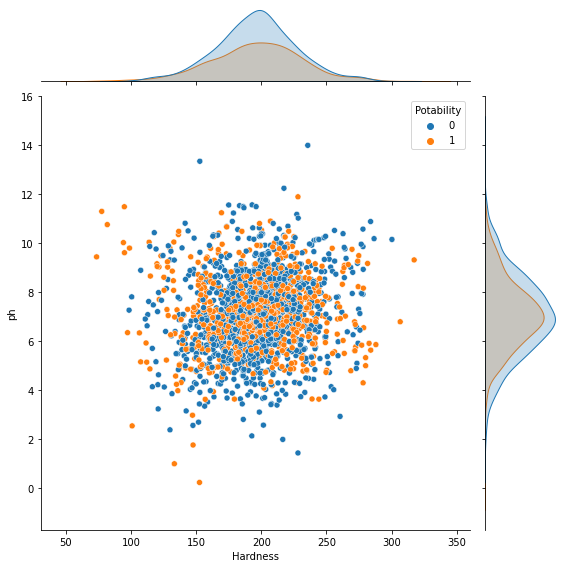

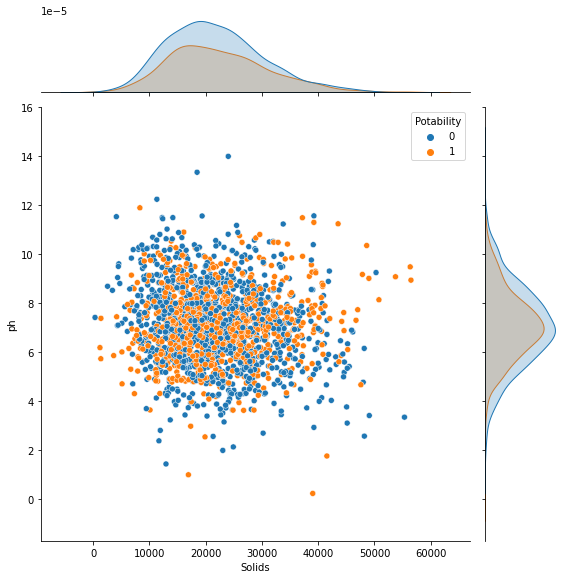

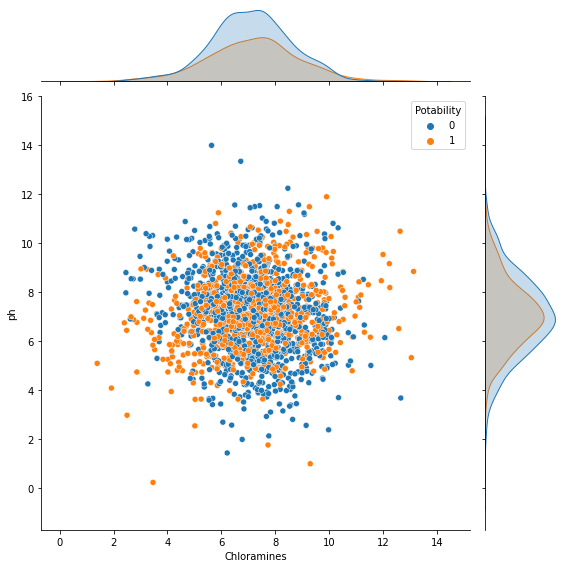

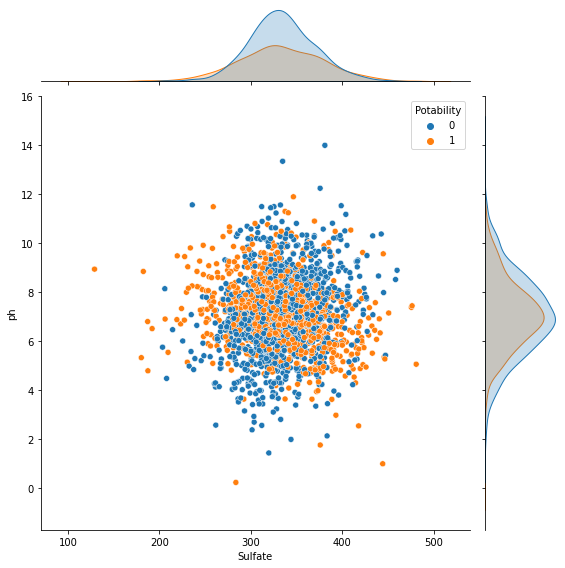

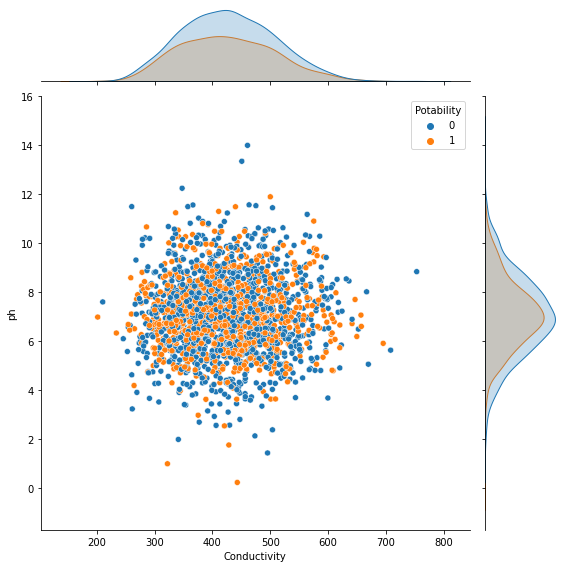

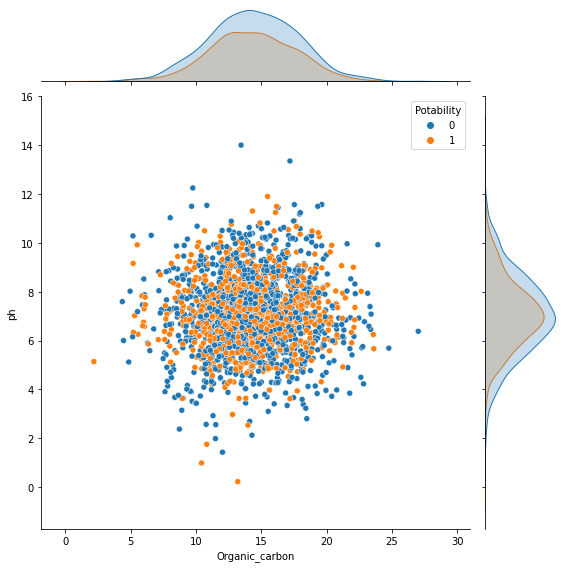

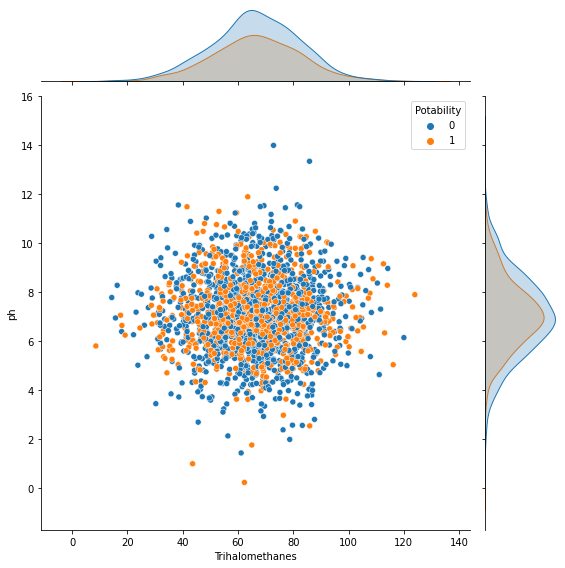

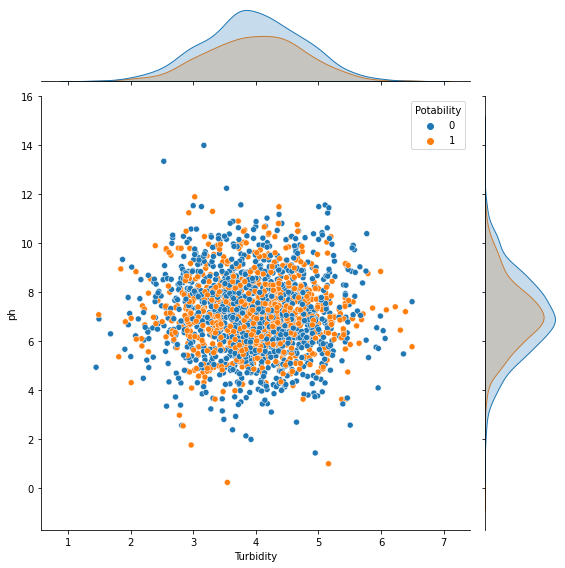

In [8]:
for predictor in predictors:
    sns.jointplot(data=df, x=predictor, y=target, hue=categorial, height=8)
    plt.plot()
    plt.savefig(f"{predictor}_jointplot".format())

<h1>Step 2</h1>

In [9]:
df.drop(columns='Potability').mean()

ph                     7.085990
Hardness             195.968072
Solids             21917.441374
Chloramines            7.134338
Sulfate              333.224672
Conductivity         426.526409
Organic_carbon        14.357709
Trihalomethanes       66.400859
Turbidity              3.969729
dtype: float64

In [10]:
df.drop(columns='Potability').var()

ph                 2.475388e+00
Hardness           1.065049e+03
Solids             7.468831e+07
Chloramines        2.511654e+00
Sulfate            1.697866e+03
Conductivity       6.514519e+03
Organic_carbon     1.105535e+01
Trihalomethanes    2.584734e+02
Turbidity          6.089401e-01
dtype: float64

<h1>Step 3</h1>

In [11]:
df_pot = df.query("Potability == 1")
df_not_pot = df.query("Potability == 0")

In [12]:
df_cols = list(df_pot.columns)

In [13]:
sns.set()

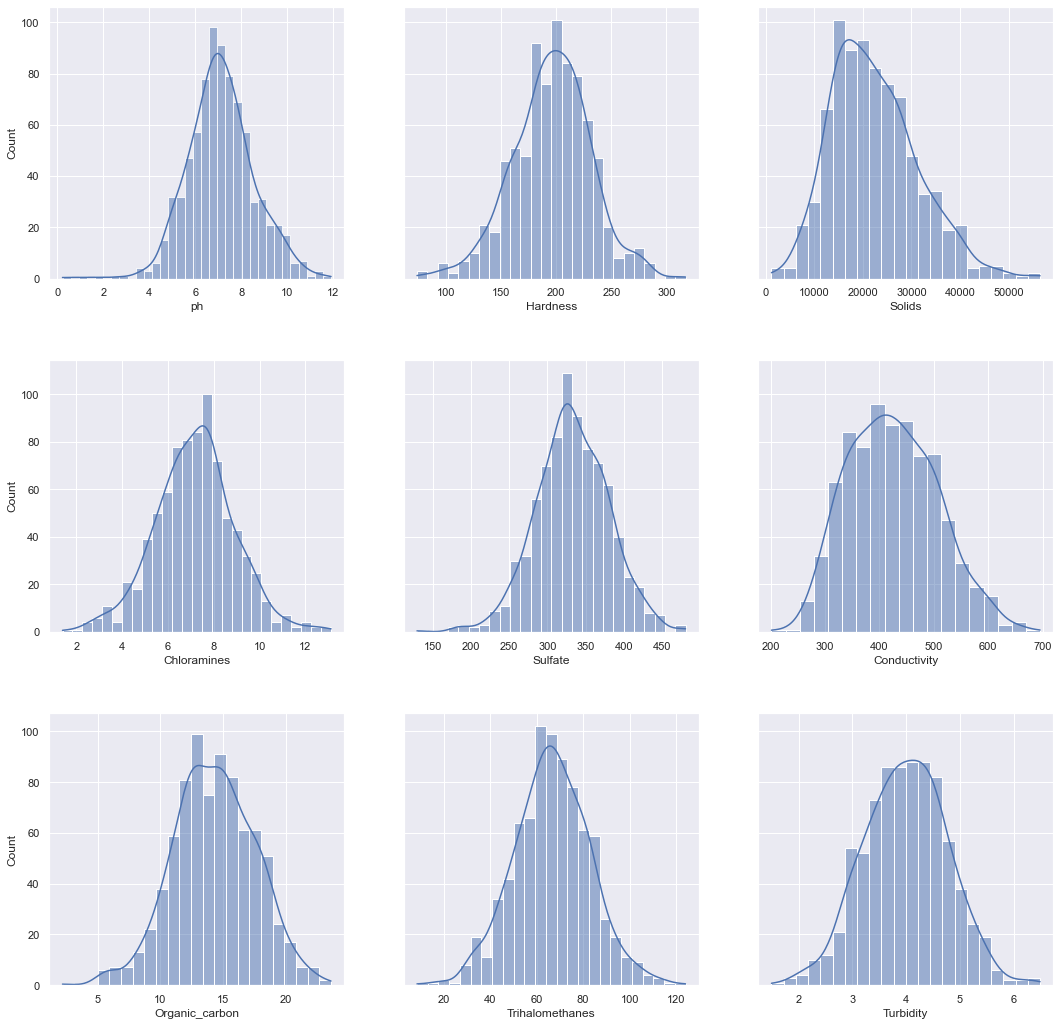

In [14]:
rows, cols = 3, 3
fig, ax = plt.subplots(rows, cols,
                       #sharex='col', 
                       sharey='row',figsize=(18,18))

plt.subplots_adjust(wspace=0.2, hspace=0.3)

num = 0
for row in range(rows):
    for col in range(cols):
        if (df_cols[num] == 'Potability'):
            break
        sns.histplot(data=df_pot, x=df_cols[num], ax=ax[row,col], kde=True)
        num += 1
        

plt.savefig("Kde_pot.png")

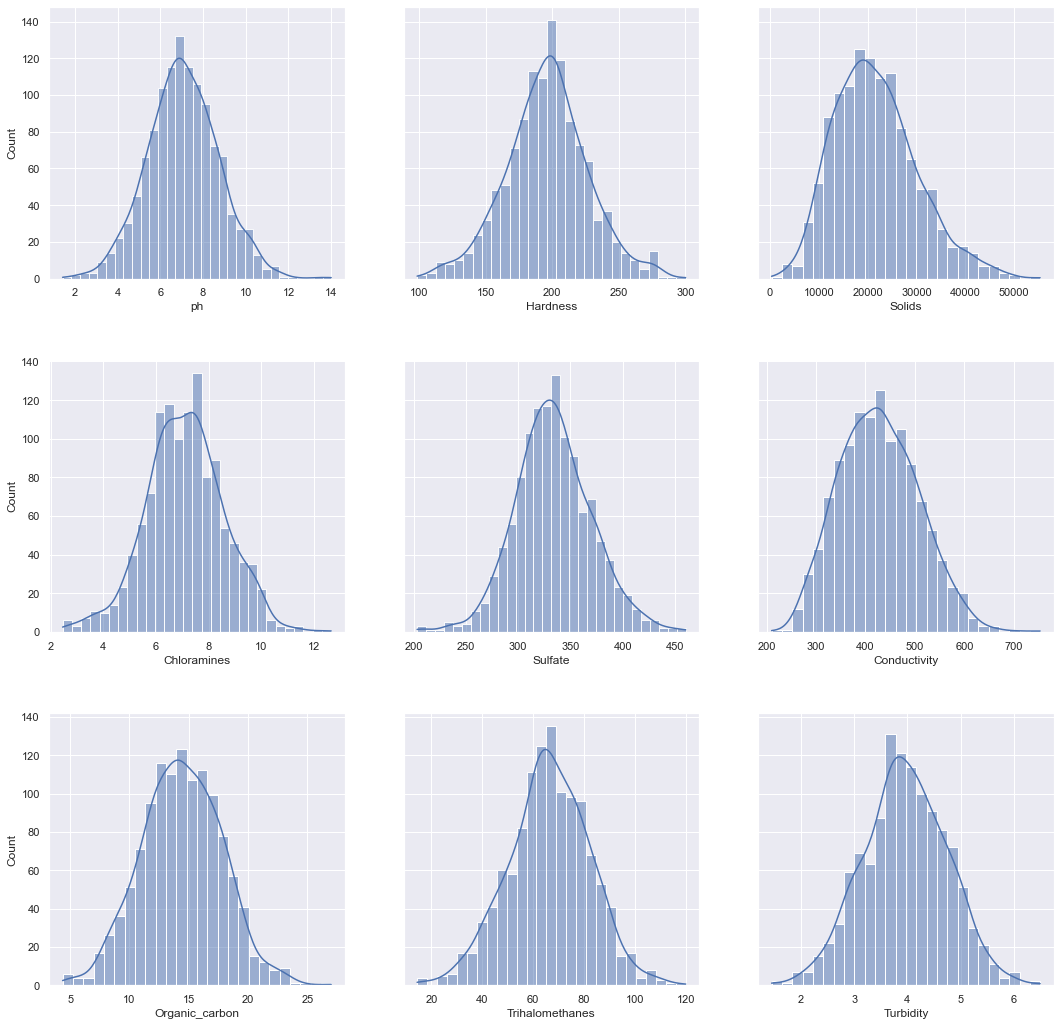

In [15]:
rows, cols = 3, 3
fig, ax = plt.subplots(rows, cols,
                       sharey='row',figsize=(18,18))

plt.subplots_adjust(wspace=0.2, hspace=0.3)

num = 0
for row in range(rows):
    for col in range(cols):
        if (df_cols[num] == 'Potability'):
            break
        sns.histplot(data=df_not_pot, x=df_cols[num], ax=ax[row,col], kde=True)
        num += 1
        

plt.savefig("Kde_not_pot.png")

In [16]:
df_pot.drop(columns='Potability').mean()

ph                     7.113791
Hardness             195.908341
Solids             22344.922883
Chloramines            7.174395
Sulfate              332.457832
Conductivity         425.005423
Organic_carbon        14.294764
Trihalomethanes       66.581596
Turbidity              3.991254
dtype: float64

In [17]:
df_not_pot.drop(columns='Potability').mean()

ph                     7.067201
Hardness             196.008440
Solids             21628.535122
Chloramines            7.107267
Sulfate              333.742928
Conductivity         427.554342
Organic_carbon        14.400250
Trihalomethanes       66.278712
Turbidity              3.955181
dtype: float64

In [18]:
df_pot.drop(columns='Potability').var()

ph                 2.066759e+00
Hardness           1.246171e+03
Solids             7.905963e+07
Chloramines        3.002580e+00
Sulfate            2.251141e+03
Conductivity       6.715963e+03
Organic_carbon     1.061403e+01
Trihalomethanes    2.656154e+02
Turbidity          6.028091e-01
dtype: float64

In [19]:
df_not_pot.drop(columns='Potability').var()

ph                 2.752632e+00
Hardness           9.435735e+02
Solids             7.159036e+07
Chloramines        2.180278e+00
Sulfate            1.324844e+03
Conductivity       6.381242e+03
Organic_carbon     1.135822e+01
Trihalomethanes    2.538271e+02
Turbidity          6.130647e-01
dtype: float64

<h1>Step 4</h1>

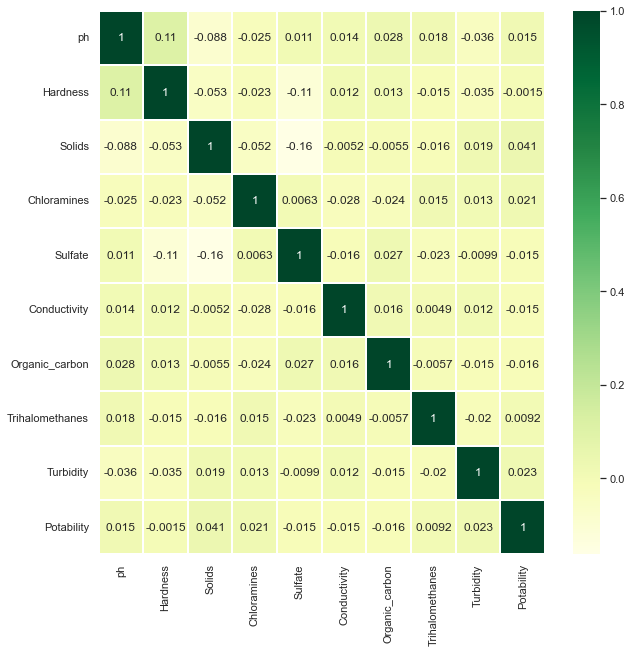

In [20]:
figure, ax = plt.subplots(1, 1, figsize=(10, 10))

sns.heatmap(df.corr(), cmap='YlGn', annot=True, linewidths=0.2)
plt.savefig("corr_map.png")

In [21]:
def pearson_p(x,y,alpha=0.05):
    r, p = scipy.stats.pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(x.size-3)
    z = scipy.stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
    return r, p, lo, hi

In [22]:
for i in df.columns:
    x = df[str(i)]
    for j in  df.columns:
        if i != j:
            y = df[str(j)]
            corr = pearson_p(x, y, alpha = 0.1)
            print('Corr of ' +  str(j) + " and " + str(i)\
                  + " is " + str(round(corr[0],3))\
                  + ", lb-ub " + str(round(corr[2],3)) + "/" \
                  + str(round(corr[3],4)) + ", p-value= " \
                  + str(round(corr[1],4)))

Corr of Hardness and ph is 0.109, lb-ub 0.073/0.1451, p-value= 0.0
Corr of Solids and ph is -0.088, lb-ub -0.124/-0.0511, p-value= 0.0001
Corr of Chloramines and ph is -0.025, lb-ub -0.061/0.0119, p-value= 0.2669
Corr of Sulfate and ph is 0.011, lb-ub -0.026/0.0472, p-value= 0.6372
Corr of Conductivity and ph is 0.014, lb-ub -0.023/0.0508, p-value= 0.5266
Corr of Organic_carbon and ph is 0.028, lb-ub -0.008/0.065, p-value= 0.2034
Corr of Trihalomethanes and ph is 0.018, lb-ub -0.018/0.0549, p-value= 0.4127
Corr of Turbidity and ph is -0.036, lb-ub -0.072/0.0008, p-value= 0.108
Corr of Potability and ph is 0.015, lb-ub -0.022/0.0512, p-value= 0.5149
Corr of ph and Hardness is 0.109, lb-ub 0.073/0.1451, p-value= 0.0
Corr of Solids and Hardness is -0.053, lb-ub -0.09/-0.0166, p-value= 0.0169
Corr of Chloramines and Hardness is -0.023, lb-ub -0.059/0.014, p-value= 0.3093
Corr of Sulfate and Hardness is -0.109, lb-ub -0.145/-0.0721, p-value= 0.0
Corr of Conductivity and Hardness is 0.012, l

<h1>Step 5 and Step 6</h1>

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

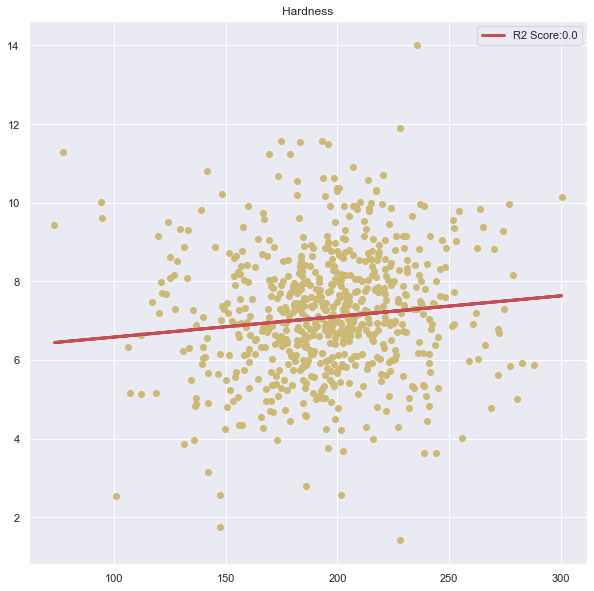

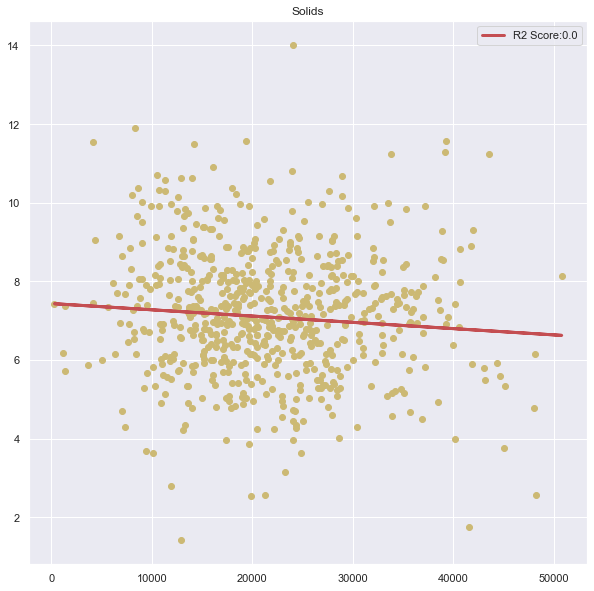

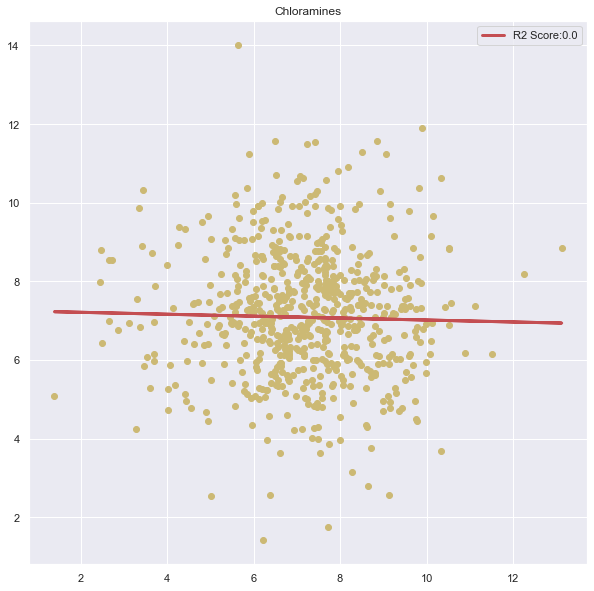

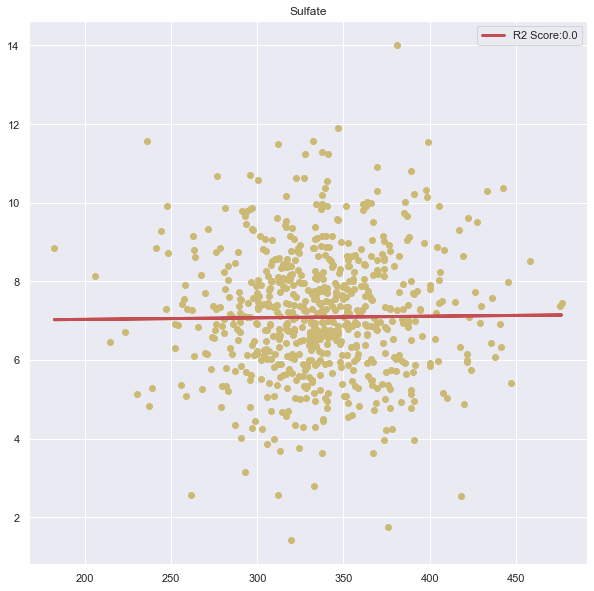

In [127]:
for col in df.drop(columns=[target]).columns[:4:]:    
    X = pd.DataFrame(df[col])
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    model = LinearRegression().fit(X,y)
    plt.figure(figsize=(10, 10))
    plt.title(col)
    plt.scatter(X_test, y_test, color='y')
    plt.plot(X_test, model.predict(X_test), linewidth=3, color='r', label=f"R2 Score:{round(r2_score(y_test, model.predict(X_test)), 3)}")
    plt.legend()
    name = col + "_regr.png"
    plt.savefig(name)
    plt.show()

In [128]:
X = df.drop(columns=target)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [136]:
model = LinearRegression()
model.fit(X_train, y_train)

mae = mean_absolute_error(y_test, model.predict(X_test))
mse = mean_squared_error(y_test, model.predict(X_test))
r2 = r2_score(y_test, model.predict(X_test))

print('Mean Absolute Error: {:.2f}'.format(mae))
print('Mean Squared Error: {:.2f}'.format(mse))
print('R2 Score: {:.1f}'.format(r2))

Mean Absolute Error: 1.25
Mean Squared Error: 2.62
R2 Score: 0.0


In [137]:
model = Lasso(alpha=0.05)
model.fit(X_train, y_train)

mae = mean_absolute_error(y_test, model.predict(X_test))
mse = mean_squared_error(y_test, model.predict(X_test))
r2 = r2_score(y_test, model.predict(X_test))

print('Mean Absolute Error: {:.2f}'.format(mae))
print('Mean Squared Error: {:.2f}'.format(mse))
print('R2 Score: {:.1f}'.format(r2))

Mean Absolute Error: 1.25
Mean Squared Error: 2.62
R2 Score: -0.0


<h1>Step 7</h1>

In [138]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

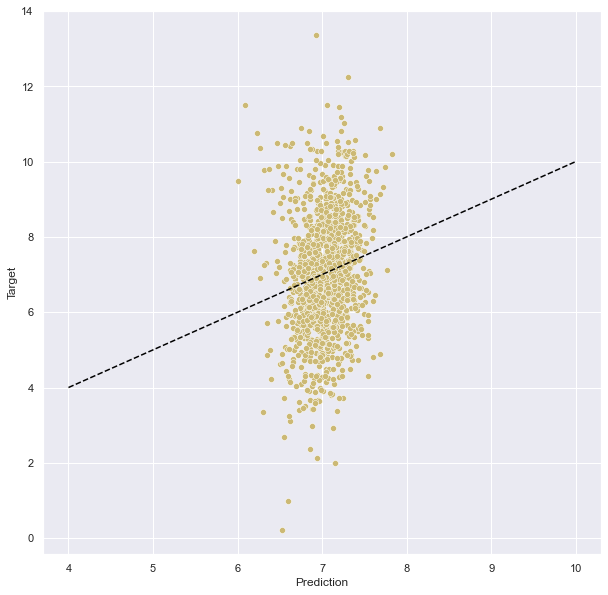

In [163]:
plt.figure(figsize=(10, 10))

y_pred = np.array(model.predict(X_train))
y_target = np.array(y_train)

sns.scatterplot(y_pred, y_target, color='y')
sns.lineplot(range(4, 11), range(4, 11), color='black', linestyle='--')

plt.xlabel('Prediction')
plt.ylabel('Target')
plt.savefig("Prediction.png")

In [141]:
residuals = y_test - y_pred

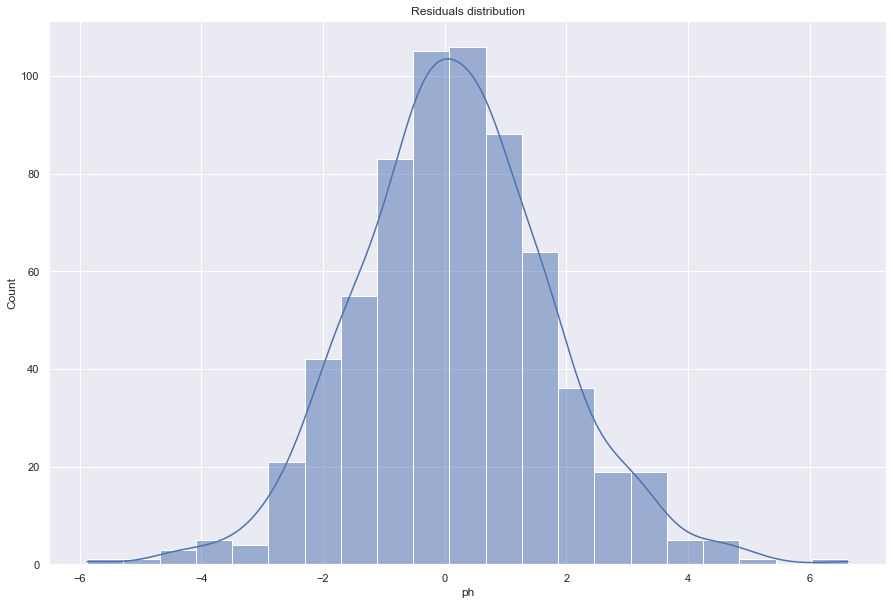

In [159]:
plt.figure(figsize=(15, 10)) 
plt.title("Residuals distribution")
sns.histplot(residuals, kde=True, bins=21) 
plt.savefig("Residuals_dist.png")

In [172]:
residuals.describe()

count    664.000000
mean       0.166694
std        1.605988
min       -5.880435
25%       -0.812040
50%        0.116388
75%        1.138783
max        6.633515
Name: ph, dtype: float64

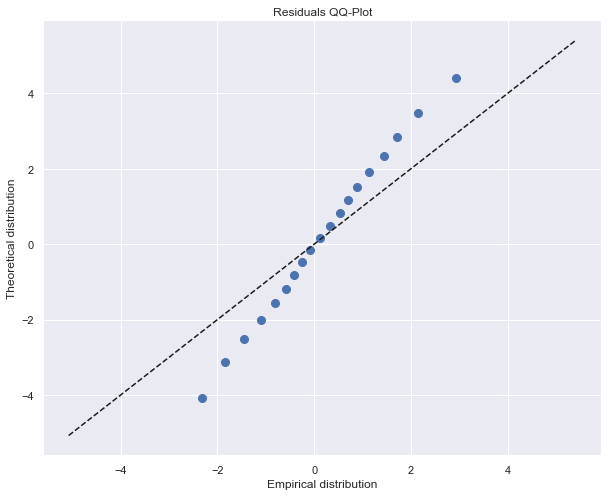

In [165]:
percs = np.linspace(5, 95, 19)
qn_first = np.percentile(residuals, percs)
qn_norm = scipy.stats.norm.ppf(percs / 100.0, loc=residuals.mean(), scale=residuals.var())


min_qn = np.min([qn_first.min(), qn_norm.min()])
max_qn = np.max([qn_first.max(), qn_norm.max()])
x = np.linspace(min_qn - 1, max_qn + 1)

# Building a quantile biplot
plt.figure(figsize=(10, 8))
plt.title("Residuals QQ-Plot")
plt.plot(qn_first, qn_norm, ls="", marker="o", markersize=8)
plt.plot(x, x, color="k", ls="--")
plt.xlabel('Empirical distribution')
plt.ylabel('Theoretical distribution')
plt.savefig("Residuals_QQ_plot.png")

In [171]:
print(scipy.stats.kstest(residuals, 'norm', (residuals.mean(), residuals.var())))
print(scipy.stats.cramervonmises(residuals, 'norm', (residuals.mean(), residuals.var())))
print(scipy.stats.shapiro(residuals))

KstestResult(statistic=0.13362365876770566, pvalue=8.442031946689331e-11)
CramerVonMisesResult(statistic=5.163552840258241, pvalue=8.970213460912646e-11)
ShapiroResult(statistic=0.9943169355392456, pvalue=0.013853596523404121)
